import tensorflow as tf

#Set up a linear classifier.
#建立一个线性分类器
classifier  = tf.estimator.LinearClassifier()

#Train the model on some example data.
#用一些范例数据来训练模型， 训练次数为2000
classifier.train(input_fn = train_input_fn, steps=2000)

#Use it to predict.
#用来预测数据
predictions = classifier.perdict(input_fn = predict_input_fn)



## Pandas 简介

### 基本概念

In [1]:


import pandas as pd

pd.__version__

'0.22.0'

In [2]:
city_names = pd.Series(['San Francisco', 'San Jose', 'Sacramento'])
population = pd.Series([852469, 1015785, 485199])

pd.DataFrame({'City name': city_names, 'Population': population })

,City name,Population
0,San Francisco,852469
1,San Jose,1015785
2,Sacramento,485199


pandas 中的主要数据结构被实现为以下两类：

DataFrame，您可以将它想象成一个关系型数据表格，其中包含多个行和已命名的列。

Series，它是单一列。DataFrame 中包含一个或多个 Series，每个 Series 均有一个名称。

加载一个 csv 文件的数据

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from pandas.plotting import _converter

california_housing_dataframe = pd.read_csv("https://storage.googleapis.com/mledu-datasets/california_housing_train.csv", sep=",")
california_housing_dataframe.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


上面的示例使用 DataFrame.describe 来显示关于 DataFrame 的有趣统计信息。另一个实用函数是 DataFrame.head，它显示 DataFrame 的前几个记录：

In [4]:
california_housing_dataframe.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000101ACBE0>]], dtype=object)

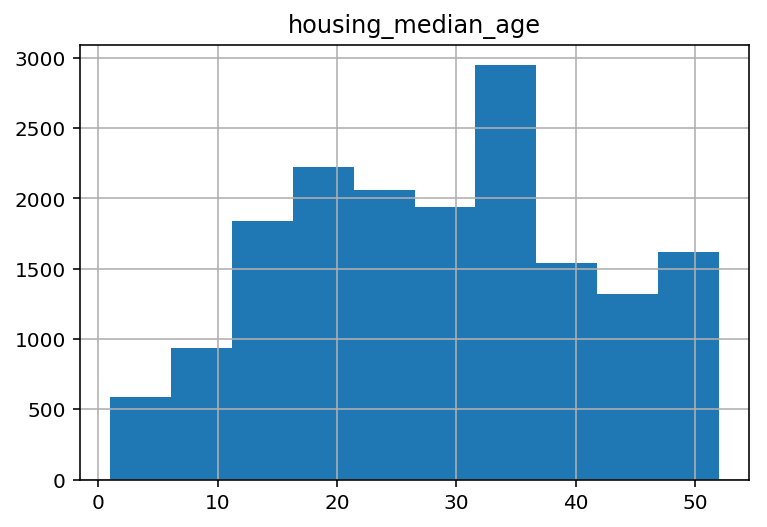

In [5]:
from pandas.plotting import _converter
_converter
california_housing_dataframe.hist('housing_median_age')

In [6]:
cities = pd.DataFrame({ 'City name': city_names, 'Population': population })
print(type(cities['City name']))
cities['City name']

<class 'pandas.core.series.Series'>


0    San Francisco
1         San Jose
2       Sacramento
Name: City name, dtype: object

In [7]:
print(type(cities['City name'][1]))
cities['City name'][1]

<class 'str'>


'San Jose'

In [8]:
print (type(cities[0:2]))
cities[0:2]

<class 'pandas.core.frame.DataFrame'>


,City name,Population
0,San Francisco,852469
1,San Jose,1015785


In [9]:
import numpy as np

np.log(population)

0    13.655892
1    13.831172
2    13.092314
dtype: float64

In [10]:
population.apply(lambda val: val > 1000000)

0    False
1     True
2    False
dtype: bool

In [11]:
cities['Area square miles'] = pd.Series([46.87, 176.53, 97.92])
cities['Population density'] = cities['Population'] / cities['Area square miles']
cities

,City name,Population,Area square miles,Population density
0,San Francisco,852469,46.87,18187.945381
1,San Jose,1015785,176.53,5754.177760
2,Sacramento,485199,97.92,4955.055147


练习 1
通过添加一个新的布尔值列（当且仅当以下两项均为 True 时为 True）修改 cities 表格：

城市以圣人命名。
城市面积大于 50 平方英里。
注意：布尔值 Series 是使用“按位”而非传统布尔值“运算符”组合的。例如，执行逻辑与时，应使用 &，而不是 and。

提示："San" 在西班牙语中意为 "saint"。

In [12]:
cities['Is wide and has saint name'] = (cities['Area square miles'] > 50) & cities['City name'].apply(lambda name: name.startswith('San'))
cities

,City name,Population,Area square miles,Population density,Is wide and has saint name
0,San Francisco,852469,46.87,18187.945381,False
1,San Jose,1015785,176.53,5754.177760,True
2,Sacramento,485199,97.92,4955.055147,False


In [13]:
city_names.index

RangeIndex(start=0, stop=3, step=1)

In [14]:
cities.index

RangeIndex(start=0, stop=3, step=1)

In [15]:
cities.reindex([2, 0, 1])

,City name,Population,Area square miles,Population density,Is wide and has saint name
2,Sacramento,485199,97.92,4955.055147,False
0,San Francisco,852469,46.87,18187.945381,False
1,San Jose,1015785,176.53,5754.177760,True


In [16]:
cities.reindex(np.random.permutation(cities.index))

,City name,Population,Area square miles,Population density,Is wide and has saint name
1,San Jose,1015785,176.53,5754.177760,True
0,San Francisco,852469,46.87,18187.945381,False
2,Sacramento,485199,97.92,4955.055147,False


In [17]:
cities.reindex([0, 4, 5, 2])

,City name,Population,Area square miles,Population density,Is wide and has saint name
0,San Francisco,852469.0,46.87,18187.945381,False
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
2,Sacramento,485199.0,97.92,4955.055147,False


这种行为是可取的，因为索引通常是从实际数据中提取的字符串（请参阅 pandas reindex 文档，查看索引值是浏览器名称的示例）。

在这种情况下，如果允许出现“丢失的”索引，您将可以轻松使用外部列表重建索引，因为您不必担心会将输入清理掉。

In [18]:
import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import tensorflow as tf
from tensorflow.python.data import Dataset


california_housing_dataframe = pd.read_csv("https://storage.googleapis.com/mledu-datasets/california_housing_train.csv", sep=",")

california_housing_dataframe = california_housing_dataframe.reindex(
    np.random.permutation(california_housing_dataframe.index))
california_housing_dataframe["median_house_value"] /= 1000.0
california_housing_dataframe


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
6277,-118.25,34.02,33.0,1676.0,525.0,2564.0,515.0,2.1957,100.800
3396,-117.88,33.70,16.0,1505.0,358.0,835.0,339.0,3.8029,205.400
12855,-121.82,37.37,41.0,1558.0,281.0,970.0,304.0,4.4167,215.200
14042,-122.05,37.93,5.0,4274.0,1153.0,1503.0,881.0,4.0473,266.500
6261,-118.25,34.10,42.0,598.0,147.0,312.0,144.0,2.6250,164.300
14259,-122.09,37.98,14.0,5381.0,871.0,2296.0,872.0,5.6875,211.000
11737,-121.31,38.03,24.0,3050.0,568.0,1743.0,549.0,3.7413,105.300
10338,-120.10,39.17,33.0,1849.0,384.0,218.0,92.0,1.7083,143.800
16246,-122.48,37.59,29.0,5889.0,959.0,2784.0,923.0,5.3991,273.000
14709,-122.19,38.09,8.0,614.0,118.0,278.0,115.0,6.3735,166.300


### 第 1 步：定义特征并配置特征列

In [19]:
#定义输入的特征数据：  total_rooms
my_feature = california_housing_dataframe[["total_rooms"]]

#为  total_rooms 专门定义一个 数字特征列
feature_columns = [tf.feature_column.numeric_column("total_rooms")]

注意：total_rooms 数据的形状是一维数组（每个街区的房间总数列表）。这是 numeric_column 的默认形状，因此我们不必将其作为参数传递。

### 第 2 步：定义目标

In [20]:
# Define the label.
targets = california_housing_dataframe["median_house_value"]

###  第 3 步：配置 LinearRegressor

In [21]:
# Use gradient descent as the optimizer for training the model.
my_optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.0000001)
my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)


feature_columns = [tf.feature_column.numeric_column("total_rooms")]

# Configure the linear regression model with our feature columns and optimizer.
# Set a learning rate of 0.0000001 for Gradient Descent.
linear_regressor = tf.estimator.LinearRegressor(
    feature_columns=feature_columns,
    optimizer=my_optimizer
)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_id': 0, '_tf_random_seed': None, '_session_config': None, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_num_worker_replicas': 1, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000000000EA552E8>, '_num_ps_replicas': 0, '_keep_checkpoint_max': 5, '_save_summary_steps': 100, '_master': '', '_keep_checkpoint_every_n_hours': 10000, '_save_checkpoints_steps': None, '_task_type': 'worker', '_model_dir': 'C:\\Users\\wist\\AppData\\Local\\Temp\\tmp_pwxb7b9', '_service': None, '_is_chief': True}


### 第 4 步：定义输入函数

In [22]:
def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    """Trains a linear regression model of one feature.
  
    Args:
      features: pandas DataFrame of features
      targets: pandas DataFrame of targets
      batch_size: Size of batches to be passed to the model
      shuffle: True or False. Whether to shuffle the data.
      num_epochs: Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
      Tuple of (features, labels) for next data batch
    """
  
    # Convert pandas data into a dict of np arrays.
    features = {key:np.array(value) for key,value in dict(features).items()}                                           
 
    # Construct a dataset, and configure batching/repeating
    ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)
    
    # Shuffle the data, if specified
    if shuffle:
      ds = ds.shuffle(buffer_size=10000)
    
    # Return the next batch of data
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

### 第 5 步：训练模型 

In [23]:
_ = linear_regressor.train(
    input_fn = lambda:my_input_fn(my_feature, targets),
    steps=100
)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\wist\AppData\Local\Temp\tmp_pwxb7b9\model.ckpt.
INFO:tensorflow:step = 1, loss = 37986.0
INFO:tensorflow:Saving checkpoints for 100 into C:\Users\wist\AppData\Local\Temp\tmp_pwxb7b9\model.ckpt.
INFO:tensorflow:Loss for final step: 50845.7.


### 第 6 步：评估模型

In [24]:
# Create an input function for predictions.
# Note: Since we're making just one prediction for each example, we don't 
# need to repeat or shuffle the data here.
prediction_input_fn =lambda: my_input_fn(my_feature, targets, num_epochs=1, shuffle=False)

# Call predict() on the linear_regressor to make predictions.
predictions = linear_regressor.predict(input_fn=prediction_input_fn)

# Format predictions as a NumPy array, so we can calculate error metrics.
predictions = np.array([item['predictions'][0] for item in predictions])

# Print Mean Squared Error and Root Mean Squared Error.
mean_squared_error = metrics.mean_squared_error(predictions, targets)
root_mean_squared_error = math.sqrt(mean_squared_error)
print ("Mean Squared Error (on training data): %0.3f" % mean_squared_error)
print ("Root Mean Squared Error (on training data): %0.3f" % root_mean_squared_error)

INFO:tensorflow:Restoring parameters from C:\Users\wist\AppData\Local\Temp\tmp_pwxb7b9\model.ckpt-100
Mean Squared Error (on training data): 56367.025
Root Mean Squared Error (on training data): 237.417


In [26]:
min_house_value = california_housing_dataframe["median_house_value"].min()
max_house_value = california_housing_dataframe["median_house_value"].max()
min_max_difference = max_house_value - min_house_value

print("Min. Median House Value: %0.3f" % min_house_value)
print ("Max. Median House Value: %0.3f" % max_house_value)
print ("Difference between Min. and Max.: %0.3f" % min_max_difference)
print ("Root Mean Squared Error: %0.3f" % root_mean_squared_error)

Min. Median House Value: 14.999
Max. Median House Value: 500.001
Difference between Min. and Max.: 485.002
Root Mean Squared Error: 237.417


In [27]:
calibration_data = pd.DataFrame()
calibration_data["predictions"] = pd.Series(predictions)
calibration_data["targets"] = pd.Series(targets)
calibration_data.describe()

,predictions,targets
count,17000.000000,17000.000000
mean,0.132183,207.300912
std,0.108997,115.983764
min,0.000100,14.999000
25%,0.073100,119.400000
50%,0.106350,180.400000
75%,0.157562,265.000000
max,1.896848,500.001000


In [28]:
sample = california_housing_dataframe.sample(n=300)

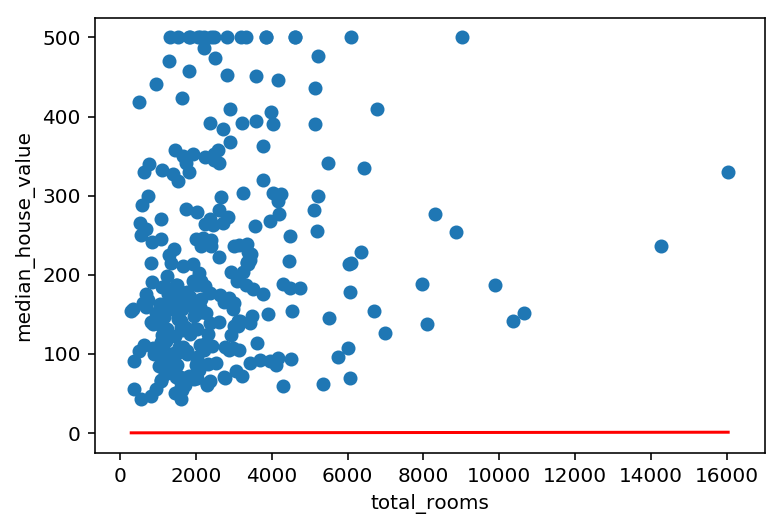

In [29]:
# Get the min and max total_rooms values.
x_0 = sample["total_rooms"].min()
x_1 = sample["total_rooms"].max()

# Retrieve the final weight and bias generated during training.
weight = linear_regressor.get_variable_value('linear/linear_model/total_rooms/weights')[0]
bias = linear_regressor.get_variable_value('linear/linear_model/bias_weights')

# Get the predicted median_house_values for the min and max total_rooms values.
y_0 = weight * x_0 + bias 
y_1 = weight * x_1 + bias

# Plot our regression line from (x_0, y_0) to (x_1, y_1).
plt.plot([x_0, x_1], [y_0, y_1], c='r')

# Label the graph axes.
plt.ylabel("median_house_value")
plt.xlabel("total_rooms")

# Plot a scatter plot from our data sample.
plt.scatter(sample["total_rooms"], sample["median_house_value"])

# Display graph.
plt.show()

### 调整模型超参数
对于本练习，为方便起见，我们已将上述所有代码放入一个函数中。您可以使用不同的参数调用该函数，以了解相应效果。

我们会在 10 个等分的时间段内使用此函数，以便观察模型在每个时间段的改善情况。

对于每个时间段，我们都会计算训练损失并绘制相应图表。这可以帮助您判断模型收敛的时间，或者模型是否需要更多迭代。

此外，我们还会绘制模型随着时间的推移学习的特征权重和偏差项值的曲线图。您还可以通过这种方式查看模型的收敛效果。

In [35]:
def train_model(learning_rate, steps, batch_size, input_feature="total_rooms"):
  """Trains a linear regression model of one feature.
  
  Args:
    learning_rate: A `float`, the learning rate.
    steps: A non-zero `int`, the total number of training steps. A training step
      consists of a forward and backward pass using a single batch.
    batch_size: A non-zero `int`, the batch size.
    input_feature: A `string` specifying a column from `california_housing_dataframe`
      to use as input feature.
  """
  
  periods = 10
  steps_per_period = steps / periods

  my_feature = input_feature
  my_feature_data = california_housing_dataframe[[my_feature]]
  my_label = "median_house_value"
  targets = california_housing_dataframe[my_label]

  # Create feature columns
  feature_columns = [tf.feature_column.numeric_column(my_feature)]
  
  # Create input functions
  training_input_fn = lambda:my_input_fn(my_feature_data, targets, batch_size=batch_size)
  prediction_input_fn = lambda: my_input_fn(my_feature_data, targets, num_epochs=1, shuffle=False)
  
  # Create a linear regressor object.
  my_optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
  my_optimizer = tf.contrib.estimator.clip_gradients_by_norm(my_optimizer, 5.0)
  linear_regressor = tf.estimator.LinearRegressor(
      feature_columns=feature_columns,
      optimizer=my_optimizer
  )

  # Set up to plot the state of our model's line each period.
  plt.figure(figsize=(15, 6))
  plt.subplot(1, 2, 1)
  plt.title("Learned Line by Period")
  plt.ylabel(my_label)
  plt.xlabel(my_feature)
  sample = california_housing_dataframe.sample(n=300)
  plt.scatter(sample[my_feature], sample[my_label])
  colors = [cm.coolwarm(x) for x in np.linspace(-1, 1, periods)]

  # Train the model, but do so inside a loop so that we can periodically assess
  # loss metrics.
  print ("Training model...")
  print ("RMSE (on training data):")
  root_mean_squared_errors = []
  for period in range (0, periods):
    # Train the model, starting from the prior state.
    linear_regressor.train(
        input_fn=training_input_fn,
        steps=steps_per_period
    )
    # Take a break and compute predictions.
    predictions = linear_regressor.predict(input_fn=prediction_input_fn)
    predictions = np.array([item['predictions'][0] for item in predictions])
    
    # Compute loss.
    root_mean_squared_error = math.sqrt(
        metrics.mean_squared_error(predictions, targets))
    # Occasionally print the current loss.
    print ("  period %02d : %0.2f" % (period, root_mean_squared_error))
    # Add the loss metrics from this period to our list.
    root_mean_squared_errors.append(root_mean_squared_error)
    # Finally, track the weights and biases over time.
    # Apply some math to ensure that the data and line are plotted neatly.
    y_extents = np.array([0, sample[my_label].max()])
    
    weight = linear_regressor.get_variable_value('linear/linear_model/%s/weights' % input_feature)[0]
    bias = linear_regressor.get_variable_value('linear/linear_model/bias_weights')

    x_extents = (y_extents - bias) / weight
    x_extents = np.maximum(np.minimum(x_extents,
                                      sample[my_feature].max()),
                           sample[my_feature].min())
    y_extents = weight * x_extents + bias
    plt.plot(x_extents, y_extents, color=colors[period]) 
  print ("Model training finished.")

  # Output a graph of loss metrics over periods.
  plt.subplot(1, 2, 2)
  plt.ylabel('RMSE')
  plt.xlabel('Periods')
  plt.title("Root Mean Squared Error vs. Periods")
  plt.tight_layout()
  plt.plot(root_mean_squared_errors)

  # Output a table with calibration data.
  calibration_data = pd.DataFrame()
  calibration_data["predictions"] = pd.Series(predictions)
  calibration_data["targets"] = pd.Series(targets)
  display.display(calibration_data.describe())

  print ("Final RMSE (on training data): %0.2f" % root_mean_squared_error)
    
    
    

最后怎么说呢， 有必要整个流程， 把第一个房价预测的回归程序写出来， 不然的话， 应该真的不适合玩这东西了， 哈哈~